# FINAL PROJECT: STARTUPS RAISED AMOUNT (REGRESSION)

Columns of our final table:
* cid (pk)
* company total fund raised (response)
* company highest degree (PhD > Master > Bachelor)
* company main_people subject (sum of subject one hot)
* company location (state)
* company num_investors



In [1]:
import numpy as np 
import pandas as pd 
import sklearn 
import os
import random

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

In [3]:
df = pd.read_csv("data_final.csv")
df.drop(columns=['Unnamed: 0'], inplace=True)
features = df.columns
features = features.drop(['name', 'ipo','funded_object_id','raised_amount_usd'])

In [4]:
features

Index(['num_investors', 'type_Bachelor', 'type_Master', 'type_Other',
       'type_OtherDiploma', 'type_PhD', 'subject_Accounting',
       'subject_Accounting and Finance', 'subject_Advertising',
       'subject_Aerospace Engineering',
       ...
       'state_TN', 'state_TX', 'state_UT', 'state_VA', 'state_VT', 'state_WA',
       'state_WI', 'state_WV', 'state_WY', 'state_not specified'],
      dtype='object', length=158)

In [5]:
# df[features] = StandardScaler().fit_transform(df[features])

In [6]:
y = df['raised_amount_usd']
X = df[features]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

In [8]:
features

Index(['num_investors', 'type_Bachelor', 'type_Master', 'type_Other',
       'type_OtherDiploma', 'type_PhD', 'subject_Accounting',
       'subject_Accounting and Finance', 'subject_Advertising',
       'subject_Aerospace Engineering',
       ...
       'state_TN', 'state_TX', 'state_UT', 'state_VA', 'state_VT', 'state_WA',
       'state_WI', 'state_WV', 'state_WY', 'state_not specified'],
      dtype='object', length=158)

In [9]:
X_train

,num_investors,type_Bachelor,type_Master,type_Other,type_OtherDiploma,type_PhD,subject_Accounting,subject_Accounting and Finance,subject_Advertising,subject_Aerospace Engineering,...,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,state_not specified
4818,4,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7604,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
293,17,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4889,10,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2622,3,3.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8424,1,1.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
425,2,3.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8024,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1373,8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## linear regression

In [15]:
from sklearn.linear_model import LinearRegression,ElasticNet
import sklearn.metrics as metrics

for i in [0.1, 1, 100,10000]:
    lr = ElasticNet(tol= 0.1,alpha= i, l1_ratio = 1.0)
    lr.fit(X_train, y_train)

    y_pred = lr.predict(X_val)
    print("The first five prediction {}".format(y_pred[:5]))
    print("The real first five labels {}".format(y_test[:5]))

    mse = metrics.mean_squared_error(y_val, y_pred)
    print("Mean Squared Error {}".format(mse))

y_pred = lr.predict(X_train)
mse = metrics.mean_squared_error(y_train, y_pred)
print("Mean Squared Error {}".format(mse))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.832699864074992e+19, tolerance: 5.021666600630577e+18
  positive)


The first five prediction [16907387.79523079  6244739.44603524  9718258.93229844 12588470.5072603
 20240187.88863637]
The real first five labels 4876    10150000.0
2253     3200000.0
2712    13500000.0
3859    15000000.0
4197     5100000.0
Name: raised_amount_usd, dtype: float64
Mean Squared Error 2.163019094864663e+16


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.8307072790972416e+19, tolerance: 5.021666600630577e+18
  positive)


The first five prediction [16907376.62110651  6244742.63909175  9718117.60412236 12588482.99045729
 20240170.97125529]
The real first five labels 4876    10150000.0
2253     3200000.0
2712    13500000.0
3859    15000000.0
4197     5100000.0
Name: raised_amount_usd, dtype: float64
Mean Squared Error 2.1630185175203436e+16


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.627844502462621e+19, tolerance: 5.021666600630577e+18
  positive)


The first five prediction [16906150.25693489  6245100.77400152  9702573.15323022 12589853.45869297
 20238306.94263753]
The real first five labels 4876    10150000.0
2253     3200000.0
2712    13500000.0
3859    15000000.0
4197     5100000.0
Name: raised_amount_usd, dtype: float64
Mean Squared Error 2.1629550438173308e+16
The first five prediction [16848746.59218634  6272435.69335973  8022145.58269056 12718843.35843241
 19923299.11094494]
The real first five labels 4876    10150000.0
2253     3200000.0
2712    13500000.0
3859    15000000.0
4197     5100000.0
Name: raised_amount_usd, dtype: float64
Mean Squared Error 2.1571149208345376e+16
Mean Squared Error 6568622238893356.0


## ncs (num_investor)

In [ ]:
#Acknoledgement: https://www.kaggle.com/renanhuanca/regression-splines

In [11]:
df['num_investors']

0        9
1        3
2        1
3       19
4        5
        ..
9302     7
9303     4
9304     6
9305     9
9306    14
Name: num_investors, Length: 9307, dtype: int64

In [12]:
from matplotlib import pyplot as plt

(0.0, 1000000000.0)

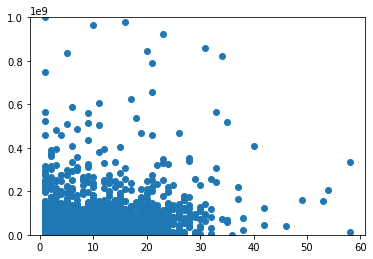

In [13]:
plt.scatter(df['num_investors'],df['raised_amount_usd'])
plt.ylim(0, 1000000000)

In [14]:
from patsy import dmatrix 
import statsmodels.api as sm
import statsmodels.formula.api as smf

# generating cubic spline with 3 knots at 25, 40 and 60
transformed_x = dmatrix("bs(train, knots=(2,3,4), degree=3, include_intercept=False)"
                        , {"train": X_train['num_investors']}, return_type='dataframe')

# fitting generalized linear model on transformed dataset
fit1 = sm.GLM(y_train, transformed_x).fit()

# # generating cubic spline with 4 knots
# transformed_x2 = dmatrix("bs(train, knots=(25,40,50,65), degree=3, include_intercept=False)", {"train": X_train}, return_type='dataframe')

# # fitting generalized linear model on transformed dataset
# fit2 = sm.GLM(train_y, transformed_x2).fit()

# # predictions on both splines
pred1 = fit1.predict(dmatrix("bs(valid, knots=(2,3,4), include_intercept=False)", {"valid":X_val['num_investors']}
                             , return_type='dataframe'))
# pred2 = fit2.predict(dmatrix("bs(valid, knots=(25, 40,50,65), degree=3, include_intercept=False)", {"valid":valid_x}, return_type='dataframe'))

# # calculating rmse
rms1 = metrics.mean_squared_error(y_val, pred1)
print(rms1)

# rms2 = sqrt(mean_squared_error(valid_y, pred2))
# print(rms2)

# # we wil plot the graph for 70 observations only
# xp = np.linspace(valid_x.min(), valid_x.max(), 70)

# # make some predictions
# pred1 = fit1.predict(dmatrix("bs(xp, knots=(25,40,60), include_intercept=False)", {"xp":xp}, return_type='dataframe'))
# pred2 = fit2.predict(dmatrix("bs(xp, knots=(25,40,50,60), include_intercept=False)", {"xp":xp}, return_type='dataframe'))

# # plot the splines and error bands
# plt.scatter(data.age, data.wage, facecolor='None', edgecolor='k', alpha=0.1)
# plt.plot(xp, pred1, label='Specifying degree=3 with 3 knots')
# plt.plot(xp, pred2, label='Specifying degree=3 with 4 knots')
# plt.legend()
# plt.xlim(15,85)
# plt.ylim(0, 350)
# plt.xlabel('age')
# plt.ylabel('wage')
# plt.show()

2.0915537786874108e+16


## Random Forest

## XGBoost